# 🔍 סוגי הטיפול ושילובם עם אורח חיים והתנהגויות

### 🎯 מטרת הפרויקט
הניתוח בוחן כיצד גורמים פסיכולוגיים, התנהגותיים ודמוגרפיים מתקשרים לרמות חרדה. הוא מתמקד בסוגי טיפול (רפואי מול טבעי), הרגלי בריאות, והבדלים בין קבוצות גיל ועוד.

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

df = pd.read_csv("enhanced_anxiety_dataset.csv")

In [4]:
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [5]:
df.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

נבחן את שיעור הנבדקים שנוטלים תרופות פסיכיאטריות לעומת אלו שפונים לטיפול פסיכולוגי.

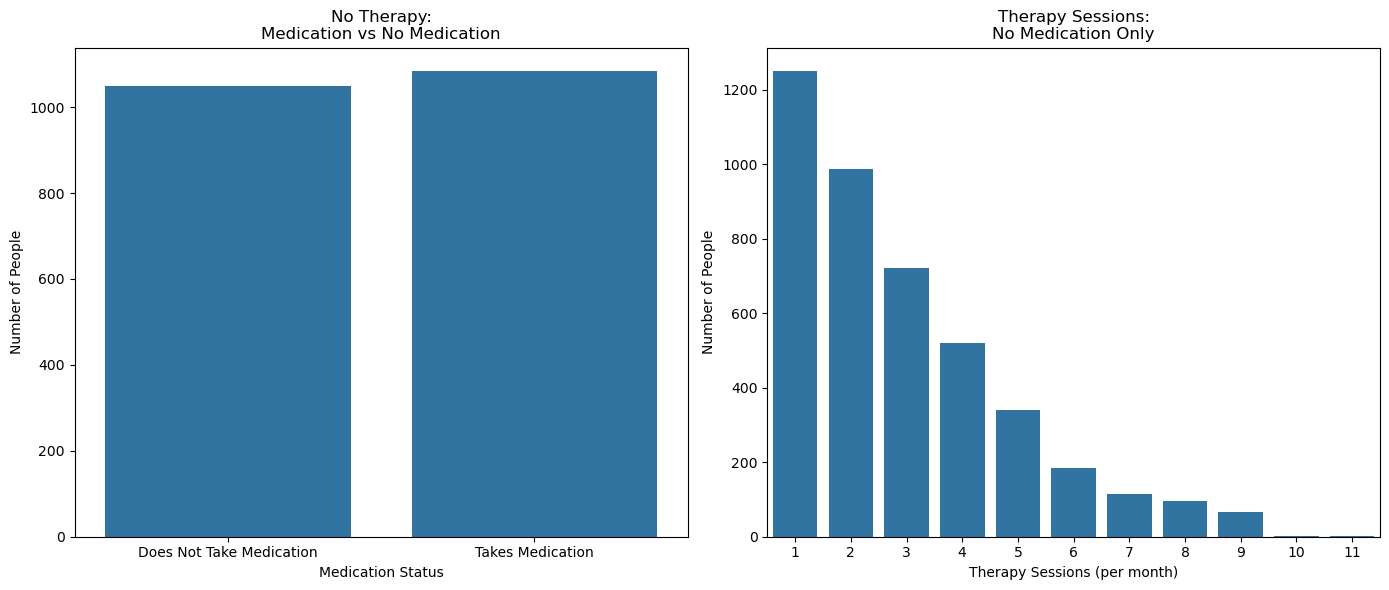

In [7]:
medication_only = df[(df['Medication'] == 'Yes') & (df['Therapy Sessions (per month)'] == 0)]
therapy_only = df[(df['Medication'] == 'No') & (df['Therapy Sessions (per month)'] > 0)]

# Re-defining therapy_only_participants since it's not currently defined
therapy_only_participants = df[(df['Medication'] == 'No') & (df['Therapy Sessions (per month)'] > 0)].copy()

# First graph: people who do not go to therapy at all, split by medication status
no_therapy_participants = df[df['Therapy Sessions (per month)'] == 0].copy()
no_therapy_participants['Medication Status'] = no_therapy_participants['Medication'].map({'Yes': 'Takes Medication', 'No': 'Does Not Take Medication'})

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Left graph: Medication status among those not going to therapy
sns.countplot(data=no_therapy_participants,
              x='Medication Status',
              ax=axes[0])
axes[0].set_title('No Therapy:\nMedication vs No Medication')
axes[0].set_ylabel('Number of People')

# Right graph: Therapy sessions among those who do not take medication
sns.countplot(data=therapy_only_participants,
              x='Therapy Sessions (per month)',
              ax=axes[1])
axes[1].set_title('Therapy Sessions:\nNo Medication Only')
axes[1].set_ylabel('Number of People')

plt.tight_layout()
plt.show()


נציג את ההתפלגות באופן ויזואלי נוסף.

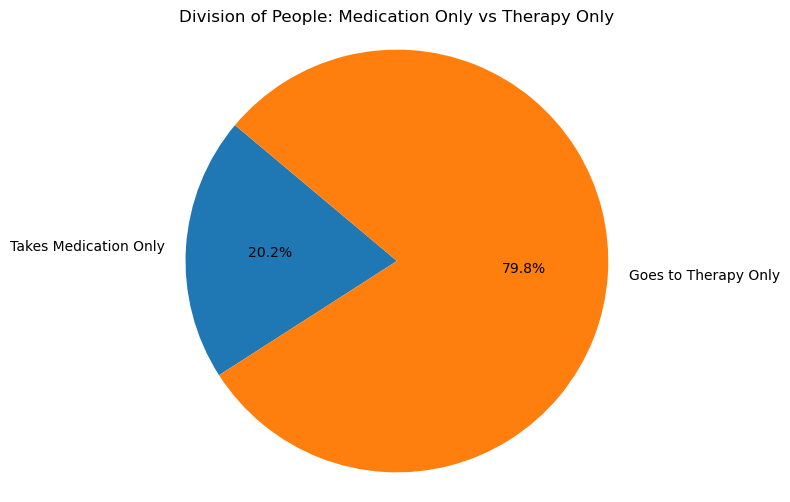

In [9]:
# Filter two exclusive groups

# Prepare data
labels = ['Takes Medication Only', 'Goes to Therapy Only']
sizes = [len(medication_only), len(therapy_only)]

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Division of People: Medication Only vs Therapy Only')
plt.axis('equal')
plt.show()


מהנתונים עולה כי כ-80% מהנבדקים פונים לטיפול פסיכולוגי ואינם נוטלים תרופות פסיכיאטריות.

כעת נבחן את הקשר בין רמות חרדה לבין סוג הטיפול: תרופתי או פסיכולוגי.

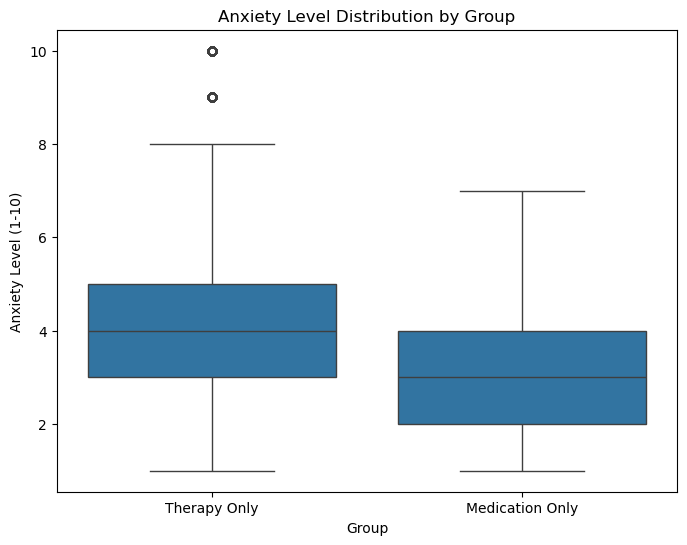

In [12]:
# Add a new column to identify group membership
df['Group'] = 'Other'
df.loc[medication_only.index, 'Group'] = 'Medication Only'
df.loc[therapy_only.index, 'Group'] = 'Therapy Only'

# Filter only the relevant groups
relevant_groups = df[df['Group'].isin(['Medication Only', 'Therapy Only'])]

# Plot the anxiety level distribution by group
plt.figure(figsize=(8, 6))
sns.boxplot(data=relevant_groups, x='Group', y='Anxiety Level (1-10)')
plt.title('Anxiety Level Distribution by Group')
plt.ylabel('Anxiety Level (1-10)')
plt.xlabel('Group')
plt.show()

נראה כי נבדקים הבוחרים בטיפול פסיכולוגי בלבד מציגים בממוצע רמות חרדה מעט גבוהות יותר.

נעמיק בניתוח של נבדקים הפונים לטיפול פסיכולוגי בלבד, ונבחן כיצד משך הטיפול משפיע על רמת החרדה.

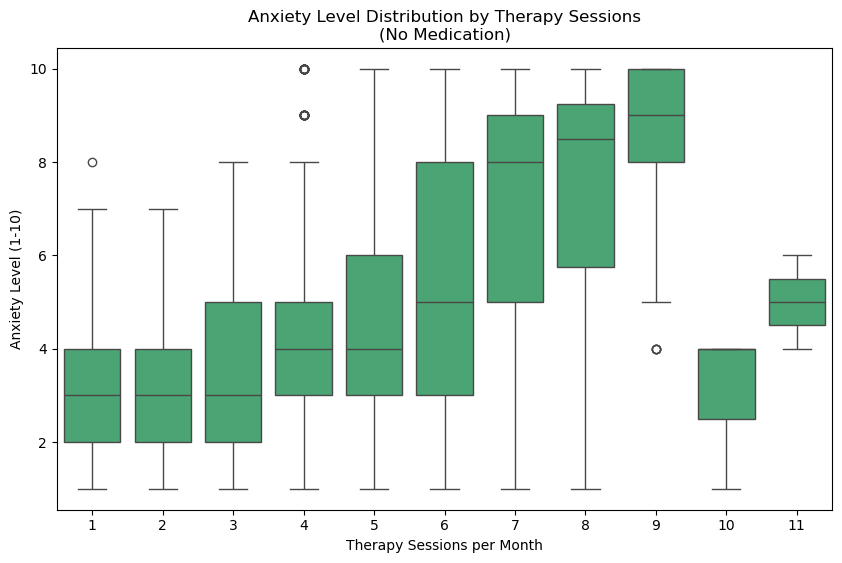

In [15]:
# Filter only people who go to therapy and do not take medication
therapy_no_med = df[(df['Therapy Sessions (per month)'] > 0) & (df['Medication'] == 'No')]

# Plot anxiety distribution by therapy sessions (no medication only)
plt.figure(figsize=(10, 6))
sns.boxplot(data=therapy_no_med,
            x='Therapy Sessions (per month)',
            y='Anxiety Level (1-10)',
            color='mediumseagreen')
plt.title('Anxiety Level Distribution by Therapy Sessions\n(No Medication)')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Anxiety Level (1-10)')
plt.show()


ככל שמשך הטיפול הפסיכולוגי עולה, רמת החרדה הממוצעת עולה גם היא.
עם זאת, נראה כי נבדקים העוברים 10–11 טיפולים בחודש (כשלושה טיפולים בשבוע) מציגים דווקא רמות חרדה נמוכות יותר.
נבדוק את הממצאים לעומק – תחילה נבחן את גודל הקבוצה.

In [17]:
therapy_no_med_filtered = therapy_no_med[therapy_no_med['Therapy Sessions (per month)'] >= 10]
therapy_no_med_filtered['Therapy Sessions (per month)'].value_counts()

Therapy Sessions (per month)
10    3
11    2
Name: count, dtype: int64

נראה כי מדובר בקבוצה קטנה של חמישה נבדקים בלבד. לכן, נימנע בשלב זה מהסקת מסקנות מבוססות.

נציג את הגרף מחדש ללא אותם נבדקים חריגים.

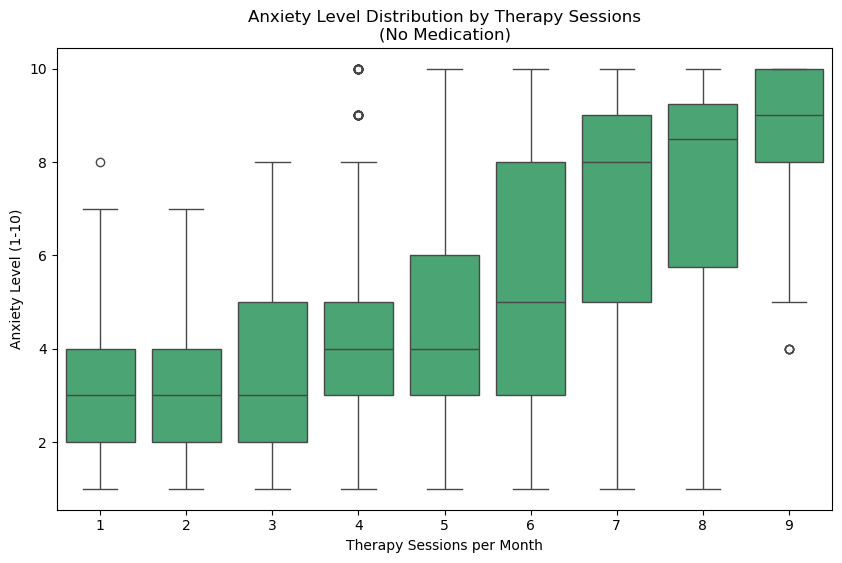

In [20]:
# Filter only people who go to therapy and do not take medication
therapy_no_med = df[(df['Therapy Sessions (per month)'] > 0) & (df['Medication'] == 'No')]

# Remove people who attend 10+ therapy sessions (even if few exist)
therapy_no_med = therapy_no_med[therapy_no_med['Therapy Sessions (per month)'] < 10]
# Make a safe copy
therapy_no_med = therapy_no_med.copy()


# Plot anxiety distribution by therapy sessions (no medication only)
plt.figure(figsize=(10, 6))
sns.boxplot(data=therapy_no_med,
            x='Therapy Sessions (per month)',
            y='Anxiety Level (1-10)',
            color='mediumseagreen')
plt.title('Anxiety Level Distribution by Therapy Sessions\n(No Medication)')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Anxiety Level (1-10)')
plt.show()


כעת נעמיק ונבחן מאפיינים נוספים של קבוצות שונות.

## כיצד מתפלגים הגילאים בקבוצה זו?

C:\Users\danie\AppData\Local\Temp\ipykernel_4292\2154064568.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = therapy_no_med.groupby(['Therapy Sessions (per month)', 'Age Group'])['Anxiety Level (1-10)'].mean().reset_index()


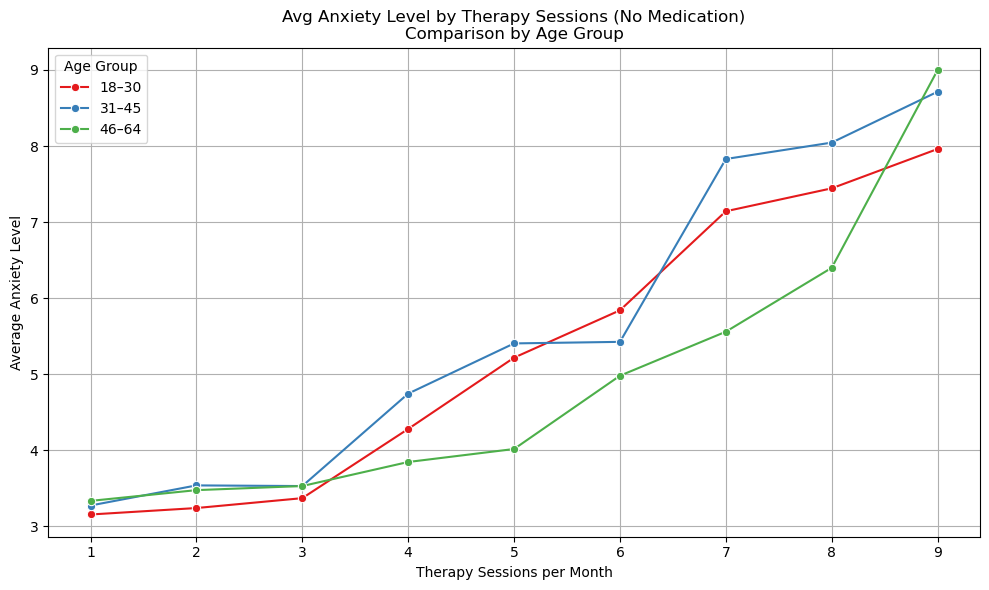

In [23]:
# Define age bins (18–64 only)
age_bins = [17, 30, 45, 65]
age_labels = ['18–30', '31–45', '46–64']
therapy_no_med['Age Group'] = pd.cut(therapy_no_med['Age'], bins=age_bins, labels=age_labels)

# Group by Therapy Sessions and Age Group to calculate mean anxiety
grouped = therapy_no_med.groupby(['Therapy Sessions (per month)', 'Age Group'])['Anxiety Level (1-10)'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(
    data=grouped,
    x='Therapy Sessions (per month)',
    y='Anxiety Level (1-10)',
    hue='Age Group',
    marker='o',
    palette='Set1',
    err_style='band',  # shaded error bands
)
plt.title('Avg Anxiety Level by Therapy Sessions (No Medication)\nComparison by Age Group')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()


<div dir="rtl" style="text-align: right;">

### 🧠 תובנה ראשונה:

בקבוצת הגיל **46–64**, קצב עליית רמות החרדה עם העלייה בתדירות המפגשים הטיפוליים היה איטי יותר בהשוואה לקבוצות גיל צעירות יותר.

הסבר אפשרי לכך טמון בכך שעם הגיל מצטברות גם **מיומנויות טבעיות לוויסות רגשי** – בין אם מתוך ניסיון חיים, התמודדות עם מצבי לחץ לאורך השנים, או הסתגלות למצבים משתנים. ייתכן שבני קבוצת גיל זו מגיעים לטיפול עם יכולות התמודדות בסיסיות שמפחיתות את עוצמת התגובה הטיפולית הראשונית.

</div>



## כיצד באה לידי ביטוי היסטוריה משפחתית של חרדה בקרב מטופלים פסיכולוגית?

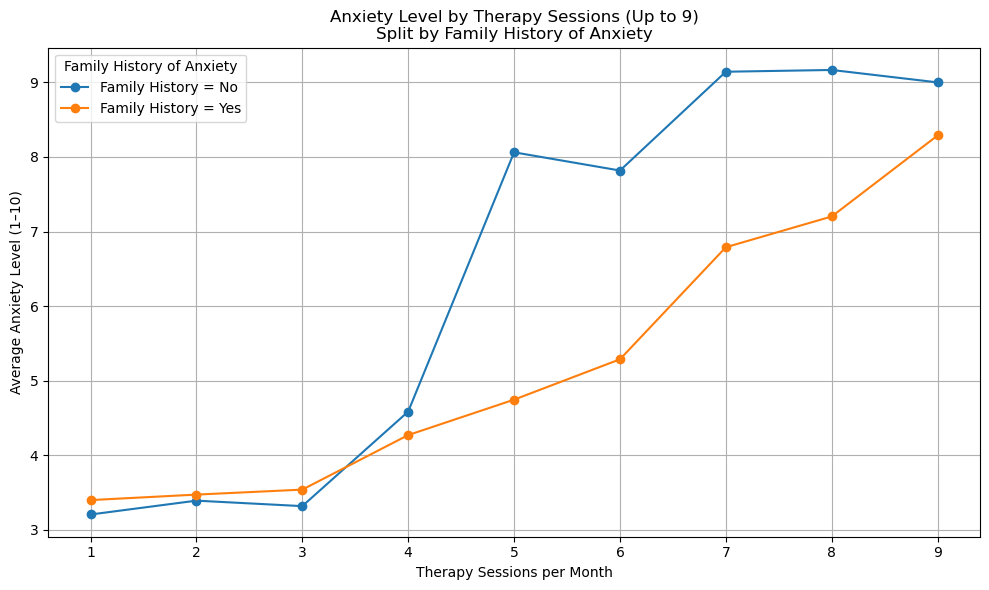

In [26]:
grouped = therapy_no_med.groupby(
    ['Therapy Sessions (per month)', 'Family History of Anxiety']
)['Anxiety Level (1-10)'].mean().reset_index()

pivoted = grouped.pivot(
    index='Therapy Sessions (per month)',
    columns='Family History of Anxiety',
    values='Anxiety Level (1-10)'
)

plt.figure(figsize=(10, 6))
for col in pivoted.columns:
    plt.plot(pivoted.index, pivoted[col], marker='o', label=f'Family History = {col}')

plt.title('Anxiety Level by Therapy Sessions (Up to 9)\nSplit by Family History of Anxiety')
plt.xlabel('Therapy Sessions per Month')
plt.ylabel('Average Anxiety Level (1–10)')
plt.legend(title='Family History of Anxiety')
plt.grid(True)
plt.tight_layout()
plt.show()

<div dir="rtl">

### 🧠 תובנה שניה:

</div>


<div dir="rtl" style="text-align: right; border: 1px solid #ddd; padding: 15px; background-color: #f9f9f9; border-radius: 8px;">
<strong>היסטורית חרדה במשפחה - מכשיר הסתגלות?</strong><br>
מטופלים ללא היסטורית חרדה במשפחה עלולים להיות פחות מודעים למושגים של ויסות רגשי ולהגיב בחרדה מוגברת בעקבות חשיפה רגשית פתאומית בטיפול.<br>
לכן, חשוב להעניק להם הכנה מותאמת וליווי רגשי הדוק בתחילת הדרך.
</div>


## השוואת התנהגויות חיצוניות: טיפול פסיכולוגי לעומת טיפול תרופתי

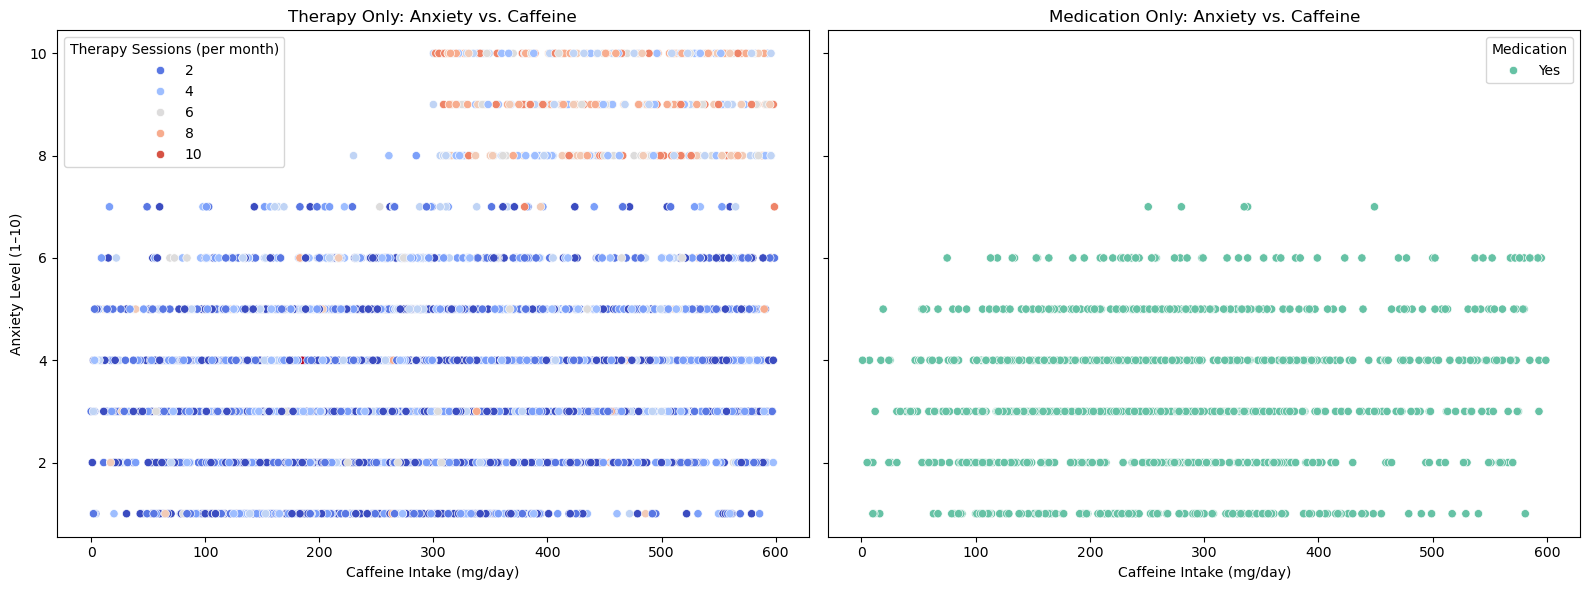

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Therapy Only
sns.scatterplot(
    data=therapy_only,
    x='Caffeine Intake (mg/day)',
    y='Anxiety Level (1-10)',
    hue='Therapy Sessions (per month)',
    palette='coolwarm',
    ax=axes[0]
)
axes[0].set_title('Therapy Only: Anxiety vs. Caffeine')
axes[0].set_xlabel('Caffeine Intake (mg/day)')
axes[0].set_ylabel('Anxiety Level (1–10)')

#  Medication Only
sns.scatterplot(
    data=medication_only,
    x='Caffeine Intake (mg/day)',
    y='Anxiety Level (1-10)',
    hue='Medication',
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title('Medication Only: Anxiety vs. Caffeine')
axes[1].set_xlabel('Caffeine Intake (mg/day)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

<div dir="rtl">

### 🧠 תובנה שלישית :
- קיים קשר חיובי מתון בין צריכת קפאין לרמת חרדה – ככל שכמות הקפאין היומית עולה, נצפים יותר מקרים של רמות חרדה גבוהות, במיוחד בצריכה העולה על 300 מ"ג ליום.

</div>


<div dir="rtl" style="text-align: right;">

### 📌 מסקנה מרכזית למקבלי החלטות:

הניתוח מצביע על כך ש**הקשר בין חרדה לבין משתנים התנהגותיים (כמו צריכת קפאין) משתנה באופן מהותי לפי סוג הטיפול הניתן למטופל**.  
בעוד שטיפול תרופתי מפחית את הרגישות להשפעות שליליות של קפאין על חרדה, מטופלים המסתמכים על טיפול פסיכולוגי בלבד מציגים פגיעות גבוהה יותר להשפעות אלו — בעיקר בקרב צעירים וללא היסטוריה משפחתית של חרדה.

יתרה מכך, נראה כי **לגיל ולהיסטוריה משפחתית תפקיד מתווך משמעותי** במידת השיפור שנצפה במהלך טיפול. מבוגרים בעלי רקע משפחתי חיובי מגיבים בצורה שונה — ומתונה יותר — לעומת צעירים חסרי רקע משפחתי.

</div>

---

<div dir="rtl" style="text-align: right; border: 1px solid #cce5ff; padding: 15px; background-color: #eaf4ff; border-radius: 8px; margin-top: 15px;">
✅ המלצה למדיניות:

יש להוביל מדיניות טיפול מותאמת אישית – המשלבת **מיפוי ראשוני של פרופיל רגשי, גיל והיסטוריה משפחתית**, כבר בתחילת קשר טיפולי.

- עבור מטופלים **צעירים וללא היסטוריה משפחתית**, מומלץ לשלב הדרכה על ויסות רגשי והגבלת קפאין באופן יזום ומובנה.
- עבור מטופלים שמסתמכים רק על טיפול פסיכולוגי – יש להגביר את הליווי הרגשי בשלבי החשיפה הראשוניים.
- כמו כן, מומלץ לעודד מחקר נוסף לשם הבנת **ההשפעה המגינה של טיפול תרופתי** במצבים של חשיפה לגורמים מחריפים (כגון קפאין).

</div>
